# Imports

In [1]:
import pandas as pd
from os import listdir
from os.path import join
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# Loading Dataset
Here is the link to the dataset : https://www.ncdc.noaa.gov/stormevents/ftp.jsp

### Loading multiple files of dataset

In [2]:
# Fetch all files in directory
files = [f for f in listdir('data/US - Storm Events/')]

# Load data from differnt files into array
dfs_loc = []
dfs_fat = []
dfs_det = []

for i in range(len(files)):
    filename = files[i]
    df = pd.read_csv(join('data/US - Storm Events/', filename), compression='gzip')
    
    if filename.startswith('StormEvents_locations'):
        dfs_loc.append(df)
    elif filename.startswith('StormEvents_fatalities'):
        dfs_fat.append(df)
    else:
        dfs_det.append(df)
    
df_loc = pd.concat(dfs_loc)
df_fat = pd.concat(dfs_fat)
df_det = pd.concat(dfs_det)

In [3]:
df_loc.head()

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201808,130479,780978,2,3.01,SSW,JACKSONVILLE,30.3100,-81.6900,3018600,8141400
1,201808,130479,780978,3,2.08,SSW,JACKSONVILLE,30.3238,-81.6871,3019428,8141226
2,201808,130479,780978,4,2.64,SSW,LAKE FOREST,30.3158,-81.6497,3018948,8138982
3,201808,130476,782301,4,1.52,NW,WEST AUBURN,41.7437,-76.1232,4144622,767392
4,201808,130476,782300,3,1.00,SSE,DIMOCK,41.7361,-75.8946,4144166,7553676


In [4]:
df_fat.head()

,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,201804,13,0,35464,753636,I,04/13/2018 00:00:00,NaN,M,Outside/Open Areas,201804.0
1,201805,28,0,35476,754296,D,05/28/2018 00:00:00,7.0,M,Under Tree,201805.0
2,201805,9,0,39699,854804,I,05/09/2018 00:00:00,NaN,NaN,Unknown,201805.0
3,201807,23,0,39903,862273,D,07/23/2018 00:00:00,NaN,NaN,Unknown,201807.0
4,201807,26,0,39914,862273,D,07/26/2018 00:00:00,NaN,NaN,Unknown,201807.0


In [5]:
df_det.head() 

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201905,9,1554,201905,9,1830,137295,824116,TEXAS,48,...,7.0,NNE,SAN GERONIMO,29.7898,-98.6406,29.7158,-98.7744,Thunderstorms developed along a cold front as ...,Thunderstorms produced heavy rain that led to ...,CSV
1,201907,15,1640,201907,15,1641,140217,843354,MINNESOTA,27,...,5.0,E,ROCK CREEK,45.7700,-92.8700,45.7700,-92.8700,An area of low pressure over southern Manitoba...,A 14-inch tree fell due to the winds and damag...,CSV
2,201909,4,1229,201909,4,1229,141212,848333,VERMONT,50,...,1.0,W,LUDLOW,43.4000,-72.7200,43.4000,-72.7200,A strong mid-level disturbance and cold front ...,Quarter size hail reported at Okemo Ski resort.,CSV
3,201909,26,1554,201909,26,1554,141215,848338,NEW YORK,36,...,5.0,SW,MADRID,44.6988,-75.2220,44.6988,-75.2220,A strong mid-level disturbance and cold front ...,A few trees and power lines downed by thunders...,CSV
4,201902,19,2226,201902,19,2350,134941,808922,ARKANSAS,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rain was heavy at times on the 19th, and there...",One-quarter inch of freezing rain was measured...,CSV


### Analysis of interest in different datasets

In [6]:
df_loc_fat = df_loc.join(df_fat.set_index('EVENT_ID'), on='EVENT_ID', how='left')
df_loc_fat.head()

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,201808,130479,780978,2,3.01,SSW,JACKSONVILLE,30.3100,-81.6900,3018600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201808,130479,780978,3,2.08,SSW,JACKSONVILLE,30.3238,-81.6871,3019428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201808,130479,780978,4,2.64,SSW,LAKE FOREST,30.3158,-81.6497,3018948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201808,130476,782301,4,1.52,NW,WEST AUBURN,41.7437,-76.1232,4144622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201808,130476,782300,3,1.00,SSE,DIMOCK,41.7361,-75.8946,4144166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cols_of_interest = ['YEAR', 'MONTH_NAME', 'STATE', 'EVENT_TYPE','EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY','DAMAGE_CROPS','SOURCE']
df_det_skinned = df_det[cols_of_interest]

In [8]:
df_det_skinned.head()

,YEAR,MONTH_NAME,STATE,EVENT_TYPE,EPISODE_NARRATIVE,EVENT_NARRATIVE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE
0,2019,May,TEXAS,Flash Flood,Thunderstorms developed along a cold front as ...,Thunderstorms produced heavy rain that led to ...,0,0,0,0,0.00K,0.00K,Law Enforcement
1,2019,July,MINNESOTA,Thunderstorm Wind,An area of low pressure over southern Manitoba...,A 14-inch tree fell due to the winds and damag...,0,0,0,0,0.00K,0.00K,Trained Spotter
2,2019,September,VERMONT,Hail,A strong mid-level disturbance and cold front ...,Quarter size hail reported at Okemo Ski resort.,0,0,0,0,0.00K,0.00K,Public
3,2019,September,NEW YORK,Thunderstorm Wind,A strong mid-level disturbance and cold front ...,A few trees and power lines downed by thunders...,0,0,0,0,5.00K,0.00K,Utility Company
4,2019,February,ARKANSAS,Ice Storm,"Rain was heavy at times on the 19th, and there...",One-quarter inch of freezing rain was measured...,0,0,0,0,0.00K,0.00K,911 Call Center


# Playing around with Dataset

### Converting to easier format

In [9]:
# Convert months to numerical for sorting
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8, 'September' : 9, 'October' : 10, 'November': 11, 'December' : 12}

# Sort dataframe by year and month
df_det_skinned = df_det_skinned.sort_values(by=['YEAR', 'MONTH_NAME'], ascending=(True, True))

df_det_skinned.head()

,YEAR,MONTH_NAME,STATE,EVENT_TYPE,EPISODE_NARRATIVE,EVENT_NARRATIVE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE
145,2016,April,WISCONSIN,Strong Wind,Western Wisconsin experienced strong winds in ...,Wind gusts of 40 to 45 mph were common across ...,0,0,0,0,0.20K,0.00K,Mesonet
146,2016,April,TENNESSEE,Strong Wind,Strong southerly gradient winds up to 50 mph a...,Strong southerly gradient winds affected the N...,0,0,0,0,3.00K,0.00K,ASOS
147,2016,April,WISCONSIN,Strong Wind,Western Wisconsin experienced strong winds in ...,Wind gusts of 40 to 50 mph were common across ...,0,0,0,0,0.20K,0.00K,Mesonet
148,2016,April,TENNESSEE,Thunderstorm Wind,Scattered showers and thunderstorms developed ...,A few trees were blown down in Waverly.,0,0,0,0,3.00K,0.00K,911 Call Center
149,2016,April,TENNESSEE,Thunderstorm Wind,Scattered showers and thunderstorms developed ...,A few scattered trees were blown down in McEwen.,0,0,0,0,5.00K,0.00K,911 Call Center


# Plotting distributions

### Number of event occurrences

Text(0, 0.5, 'Number of extreme weather events')

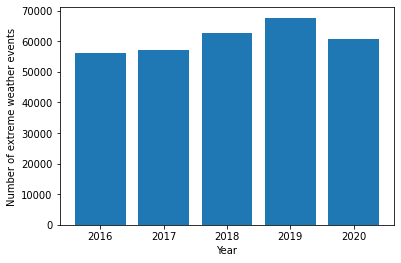

In [10]:
nb_events = []
years = range(2016, 2021)

for year in years:
    nb_events.append(len(df_det_skinned[df_det_skinned['YEAR'] == year]))

plt.bar(years, nb_events)
plt.xlabel('Year')
plt.ylabel('Number of extreme weather events')

### Number of event occurrences per type of event

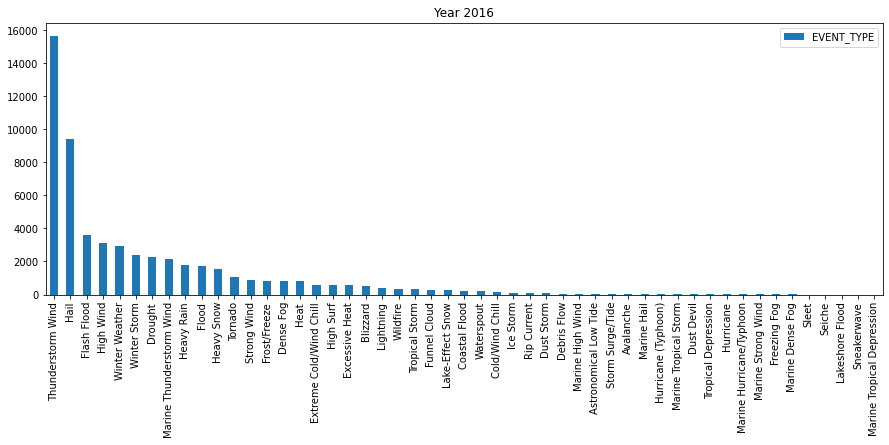

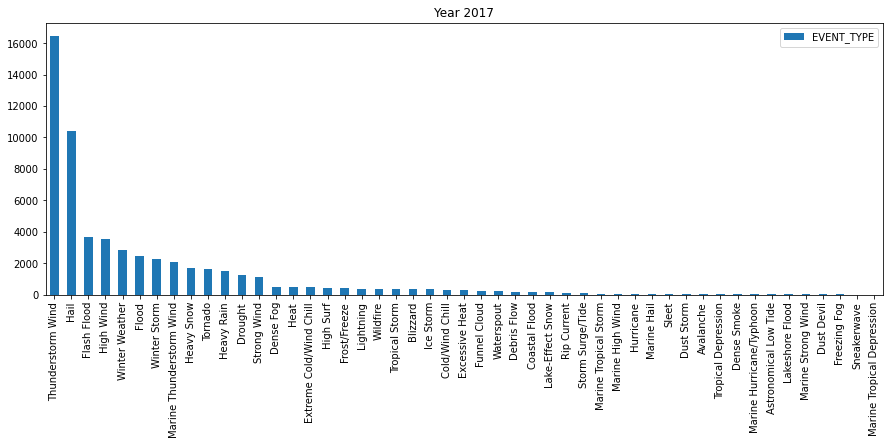

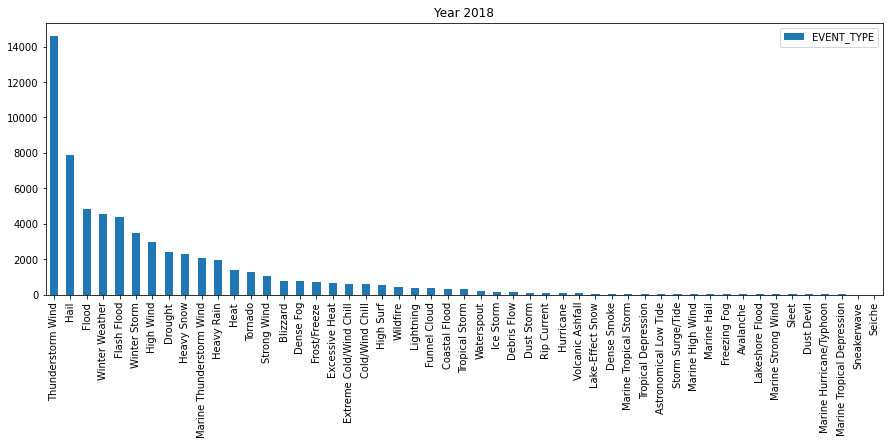

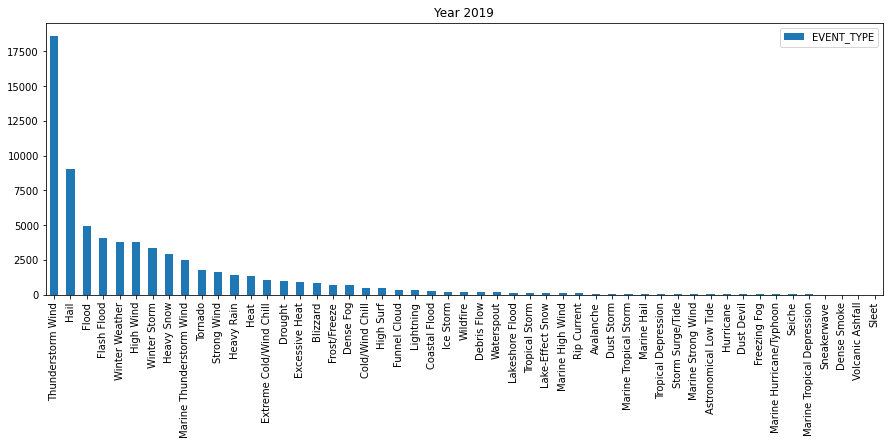

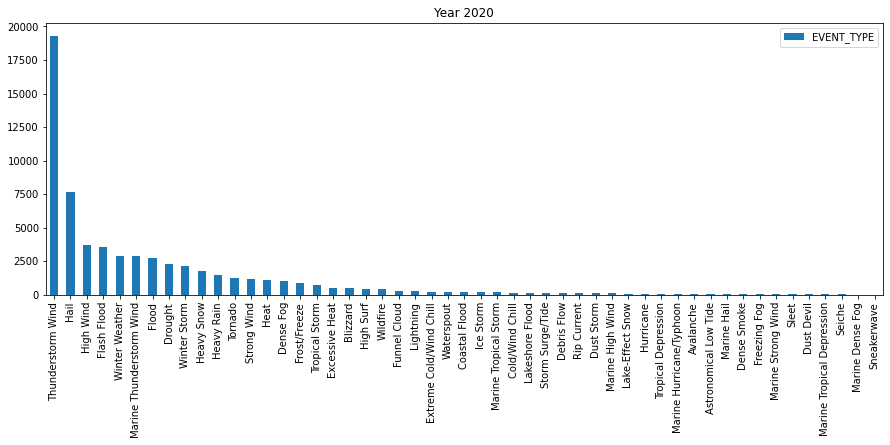

In [11]:
for year in years:
    df_year = df_det_skinned[df_det_skinned['YEAR'] == year]
    df_events = df_year[['EVENT_TYPE']]
    df_events_count = df_events.apply(pd.value_counts)
    df_events_count.plot(kind='bar', figsize=(15,5))
    plt.title('Year %i' %year)

In [12]:
df_year = df_det_skinned[df_det_skinned['YEAR'] == 2016]
df_events = df_year[['EVENT_TYPE']]
df_events_count = df_events.apply(pd.value_counts)
df_events_count.head()

,EVENT_TYPE
Thunderstorm Wind,15659
Hail,9407
Flash Flood,3586
High Wind,3120
Winter Weather,2916


# Number of ocurrences of event keeping only the biggest

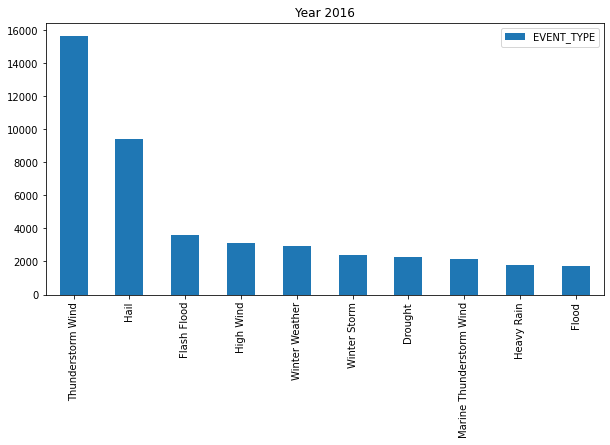

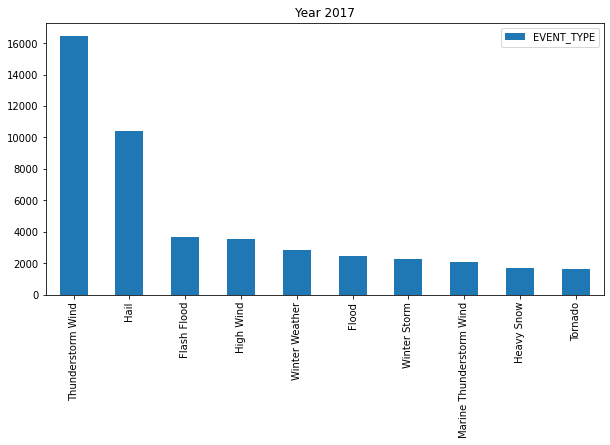

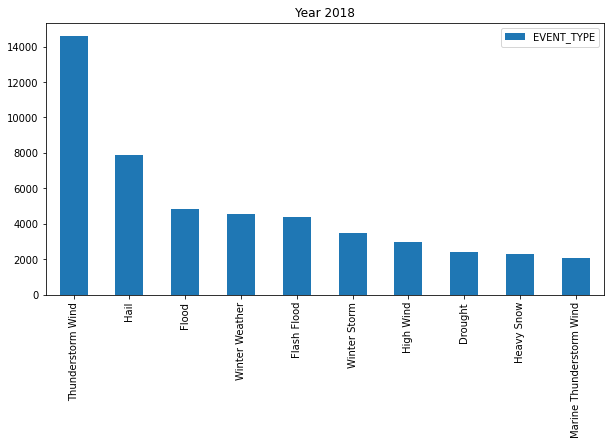

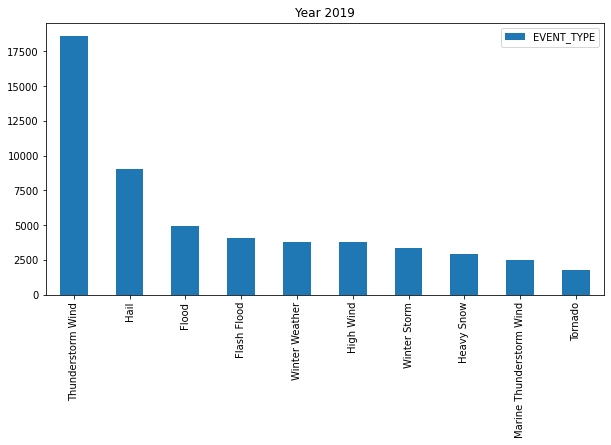

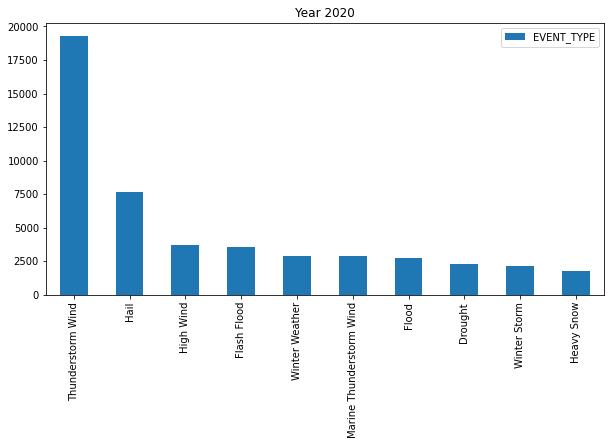

In [13]:
for year in years:
    df_year = df_det_skinned[df_det_skinned['YEAR'] == year]
    df_events = df_year[['EVENT_TYPE']]
    df_events_count = df_events.apply(pd.value_counts)
    df_events_count.sort_values(by='EVENT_TYPE') # Sort for later selection
    df_events_count[:10].plot(kind='bar', figsize=(10,5)) # Keep only the top 5
    plt.title('Year %i' %year)

# Deaths histogram

In [14]:
df_det_skinned = df_det_skinned.dropna(subset=["DAMAGE_PROPERTY"])

In [15]:
df_det_skinned.DAMAGE_PROPERTY

145       0.20K
146       3.00K
147       0.20K
148       3.00K
149       5.00K
          ...  
59096    50.00K
59123     0.00K
59124     0.00K
59125     0.00K
59139     0.00K
Name: DAMAGE_PROPERTY, Length: 243478, dtype: object

#### Replace months by numbers and sort

In [16]:
df_det_skinned['MONTH_NAME'] = df_det_skinned.MONTH_NAME.apply(lambda x : datetime.datetime.strptime(x, "%B").month)
df_det_skinned.sort_values(by=['YEAR', 'MONTH_NAME'], ascending=True)

df_det_skinned.head()

,YEAR,MONTH_NAME,STATE,EVENT_TYPE,EPISODE_NARRATIVE,EVENT_NARRATIVE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE
145,2016,4,WISCONSIN,Strong Wind,Western Wisconsin experienced strong winds in ...,Wind gusts of 40 to 45 mph were common across ...,0,0,0,0,0.20K,0.00K,Mesonet
146,2016,4,TENNESSEE,Strong Wind,Strong southerly gradient winds up to 50 mph a...,Strong southerly gradient winds affected the N...,0,0,0,0,3.00K,0.00K,ASOS
147,2016,4,WISCONSIN,Strong Wind,Western Wisconsin experienced strong winds in ...,Wind gusts of 40 to 50 mph were common across ...,0,0,0,0,0.20K,0.00K,Mesonet
148,2016,4,TENNESSEE,Thunderstorm Wind,Scattered showers and thunderstorms developed ...,A few trees were blown down in Waverly.,0,0,0,0,3.00K,0.00K,911 Call Center
149,2016,4,TENNESSEE,Thunderstorm Wind,Scattered showers and thunderstorms developed ...,A few scattered trees were blown down in McEwen.,0,0,0,0,5.00K,0.00K,911 Call Center


In [17]:
def as_number(nb):
    if 'K' in nb:
        return float(nb.replace('K', ''))
    elif 'M' in nb:
        return float(nb.replace('M', '')) * 1000

In [18]:
df_det_skinned['DAMAGE_PROPERTY'] = df_det_skinned.DAMAGE_PROPERTY.apply(as_number)

In [19]:
df_deaths = df_det_skinned.groupby(["YEAR","MONTH_NAME"]).DAMAGE_PROPERTY.sum()

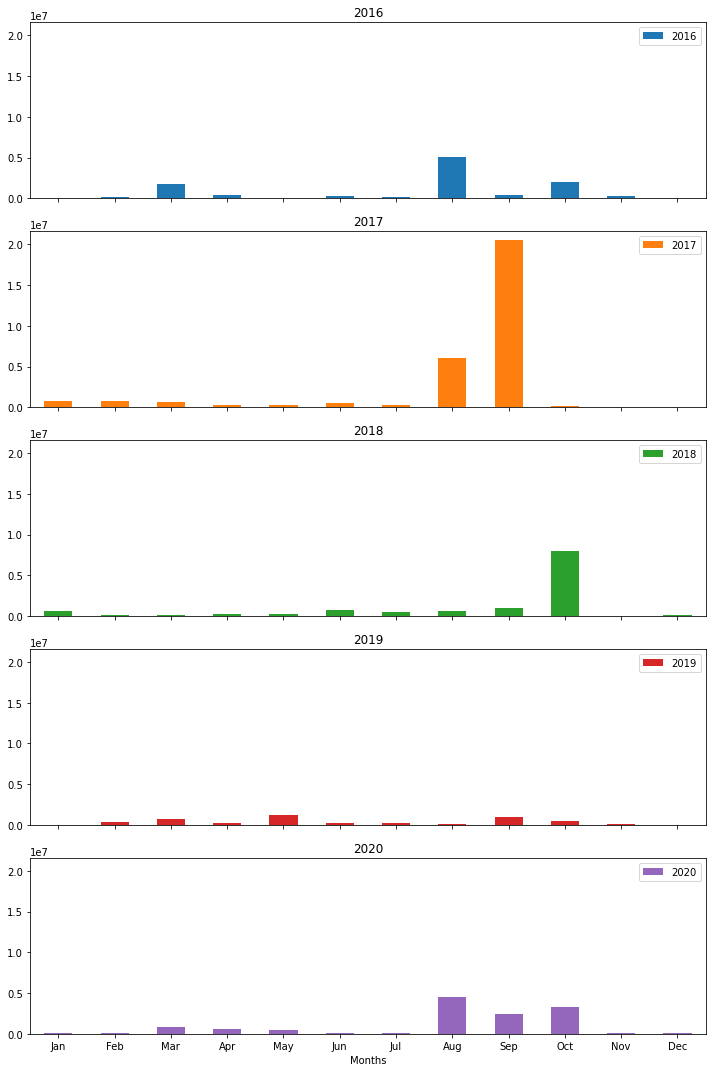

In [41]:
damage = df_deaths.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 15), layout=(5, 1), sharey=True)
plt.xlabel("Months")jljkllkjélléllkjkjlkllkéjlékjlkélkjéllélékllléàllllléàlllllllléléllllllék

month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(range(0, 12), month_names)
plt.tight_layout()

In [22]:
df_events = df_events[~df_events.DEATHS_DIRECT.isnull()]

AttributeError: 'DataFrame' object has no attribute 'DEATHS_DIRECT'

In [ ]:
df_events = df_events[df_events.DEATHS_DIRECT > 0]

In [ ]:
#for year in years:
#df_year = df_det_skinned[df_det_skinned['YEAR'] == 2016]
#df_events = df_year[['DEATHS_DIRECT']]
df_events.hist(bins=50)
#df_events.plot(kind='bar', figsize=(15,5))
#plt.title('Year %i' %year)

# Quick Observations
Number of thunderstorm winds is increasing, number of floods is decreasing.